# A/B Testing
To find ways to generate more revenue for taxi cab drivers by analysing whether there is a relationship between `payment_type` and `fare_amount`.

## Import packages

In [1]:
import pandas as pd
from scipy import stats

## Load dataset

In [143]:
# Load dataset into dataframe
df = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


## Data exploration

**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown

In [130]:
# Start with `.shape` and `.info()`
print(df.shape)
print()
print(df.info())

(22699, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  fl

In [57]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
print('Number of missing values in each column:')
print(df.isna().sum())
print()
print('Shape of dataframe:', df.shape)
print('Shape of dataframe after dropping duplicates:', df.drop_duplicates().shape)

Number of missing values in each column:
Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Shape of dataframe: (22699, 18)
Shape of dataframe after dropping duplicates: (22699, 18)


In [58]:
# descriptive stats code for EDA
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [59]:
# Find the mean fare amount for each payment type
df.groupby('payment_type').mean(numeric_only = True)[['fare_amount']]

,fare_amount
payment_type,
1,13.429748
2,12.213546
3,12.186116
4,9.913043


Passengers who paid using credit cards tend to have a higher `fare_amount` than those who paid using cash. To find out if this difference is due to random sampling or statistically significant, we conduct a hypothesis test.

## Hypothesis testing

$H_0$: There is no difference in the mean fare amount between passengers who pay using credit cards versus cash.

$H_A$: There is a statistical difference in the mean fare amount between passengers who pay using credit cards versus cash.

Significance level: 5%

In [60]:
# Conduct a two-sample t-test to compare means
credit_card = df[df['payment_type'] == 1]['fare_amount']
cash = df[df['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a = credit_card, b = cash, equal_var = False)

TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)

Since the p-value is much smaller than the significance level of 5%, we reject the null hypothesis. There is a statistically significant difference in the mean fare amount between passengers who pay using credit cards versus cash.

The recommendation would be to get customers to pay with credit cards such that the fare amount would be higher, resulting in greater profit for taxi cab drivers.

However, the dataset was not obtained by forcing passengers to pay with credit cards or cash. It might be that most people do not carry cash around with them, and choose to use credit cards to pay for larger fare amounts. Thus, it might be that `fare_amount` determines `payment_type`, instead of the other way round. 

# Multiple Linear Regression
To predict taxi fare amounts.

## Import packages

In [131]:
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
%pip install seaborn 
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

## Feature engineering

In [62]:
# Check the format of the data
df.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [132]:
# Convert datetime columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [133]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1, 'm')
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


## Outliers and imputations

In [65]:
# Call df.info() to inspect the columns and decide which ones to check for outliers.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

`passenger_count`, `trip_distance`, `fare_amount` and `duration` are the more relevant features that will be used to fit the model thus we should focus on checking for outliers of these features.

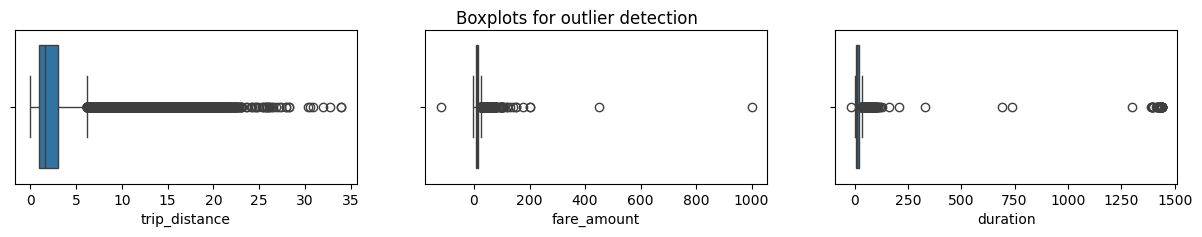

In [66]:
# Plot a box plot for each feature
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x = df['trip_distance'])
sns.boxplot(ax=axes[1], x = df['fare_amount'])
sns.boxplot(ax=axes[2], x = df['duration'])
plt.show();

All 4 features contain outliers. However, `fare_amount` and `duration` have problematic outliers that are on the higher end. We will have to impute them.

### `trip_distance` outliers
Descriptive statistics show that there are trip distances of 0. To find out if they were errors or very short trips that got rounded down to 0, check the 10 smallest unique values of `trip_distance`.

In [67]:
df.drop_duplicates(subset = ['trip_distance']).sort_values(by = 'trip_distance', ascending = True).head(10)[['trip_distance']]

,trip_distance
128,0.00
2985,0.01
323,0.02
3158,0.03
1510,0.04
10146,0.05
4423,0.06
922,0.07
4623,0.08
22035,0.09


It cannot be that the distances were rounded down. It could be that the ride was cancelled before it even started. Check for the count of rides where `trip_distance` is 0.

In [70]:
df[df['trip_distance'] == 0].count()

Unnamed: 0               148
VendorID                 148
tpep_pickup_datetime     148
tpep_dropoff_datetime    148
passenger_count          148
trip_distance            148
RatecodeID               148
store_and_fwd_flag       148
PULocationID             148
DOLocationID             148
payment_type             148
fare_amount              148
extra                    148
mta_tax                  148
tip_amount               148
tolls_amount             148
improvement_surcharge    148
total_amount             148
duration                 148
dtype: int64

Only a small percentage of data have `trip_distance` as 0, which will affect the model much. We can just leave them.

### `fare_amount` outliers

In [72]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

`fare_amount` should not be negative, neither should it be almost $1000. 

Outliers are usually deemed as data points greater than Q3 + (1.5 * IQR). However, Q3 + (1.5 * IQR) = $26.50 in this case, which does not seem appropriate for the maximum amount. We will use Q3 + (6 * IQR) instead.

In [135]:
# Impute values less than $0 with 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

In [136]:
# Impute the maximum value as Q3 + (6 * IQR)
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for column in column_list:
        # Reassign minimum to zero
        df.loc[df[column] < 0, column] = 0

        # Calculate upper threshold
        Q3 = df[column].quantile(0.75)
        Q1 = df[column].quantile(0.25)
        IQR = Q3 - Q1
        upp_threshold = Q3 + (iqr_factor * IQR)
        print('upper threshold =', upp_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[column] > upp_threshold, column] = upp_threshold
        print(df[column].describe())
        
outlier_imputer(['fare_amount'], 6)

upper threshold = 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


### `duration` outliers

In [75]:
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

`duration` should not be negative and the maximum is almost 24h.

In [137]:
# Impute a 0 for any negative values
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()

0.0

In [138]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

upper threshold = 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


## Feature engineering

### Create a `mean_distance` column.

In [139]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112


In [140]:
# Group each row by the new `pickup_dropoff` column and compute the mean for `trip_distance`
grouped = df.groupby('pickup_dropoff').mean(numeric_only = True)[['trip_distance']]
grouped.head()

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [142]:
# Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [82]:
# Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID'] == 100) & (df['DOLocationID'] == 231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


### Create a `mean_duration` column.

In [83]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only = True)[['duration']]

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']
df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID'] == 100) & (df['DOLocationID'] == 231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


### Create `day` and `month` columns.

In [84]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April


### Create `rush_hour` column.
Rush hour is defined as a weekday AND either from 0600-1000 or from 1600-2000. `rush_hour` column contains a 1 if the ride was during rush hour and a 0 if it was not.

In [86]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['Saturday', 'Sunday']),  'rush_hour'] = 0

def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

# Apply the `rush_hourizer()` function to the new column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis = 1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April,0


## Visualise relationship

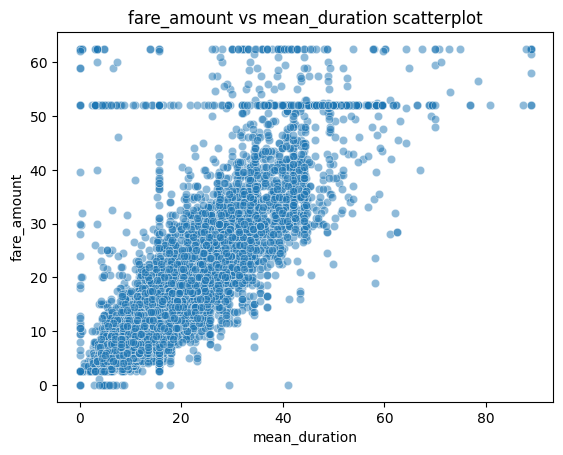

In [88]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.scatterplot(x = df['mean_duration'], y = df['fare_amount'], alpha = 0.5)
plt.title('fare_amount vs mean_duration scatterplot')
plt.show();

Predictor variable `mean_duration` is linearly related to the outcome variable `fare_amount`. The horizontal line at `fare_amount` = $62.50 is the result of imputing an upper threshold on the outliers. We will now check out the other horizontal line.

In [91]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
51.0      7
60.0      6
55.0      6
51.5      6
53.0      4
52.5      4
61.0      3
62.0      3
55.5      3
56.0      3
56.5      3
58.5      2
59.5      2
61.5      2
57.0      2
54.0      2
58.0      1
54.7      1
54.5      1
Name: fare_amount, dtype: int64

There are 514 trips with `fare_amount` $52.

In [90]:
# Examine the first 30 of these trips
pd.set_option('display.max_columns', None)
df[df['fare_amount'] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,Sunday,March,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,Saturday,June,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,Saturday,November,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,Wednesday,December,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,Sunday,September,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,Tuesday,February,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,Monday,June,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,Thursday,August,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,Tuesday,September,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,Sunday,April,0


The `RatecodeID` was 2 for all and most of the LocationID were 132 either at pick up or drop off. Data dictionary states that `RatecodeID` of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A google search tells us that there was indeed a flat rate for taxi trips to and fro the airport.

## Select variables

In [97]:
df2 = df[['VendorID', 'passenger_count', 'RatecodeID', 'fare_amount', 'mean_distance', 'mean_duration', 'rush_hour']]

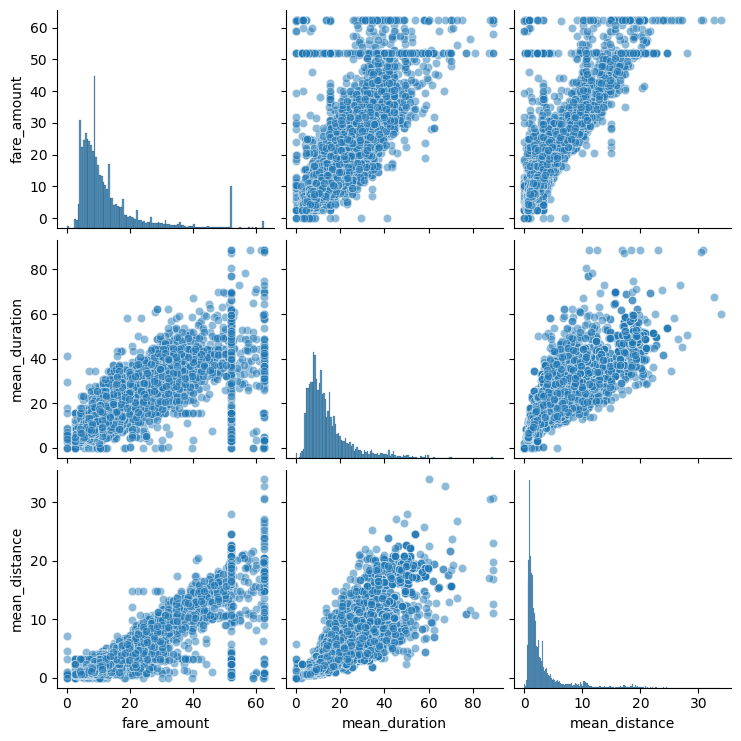

In [98]:
# Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`
rs = df2[['fare_amount', 'mean_duration', 'mean_distance']]
sns.pairplot(rs, plot_kws = {'alpha':0.5})
plt.show()

There is correlation between features.

In [99]:
# Correlation matrix to help determine most correlated variables
df2.corr()

,VendorID,passenger_count,RatecodeID,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,-0.002991,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,-0.005743,0.014942,0.013428,0.015852,-0.022035
RatecodeID,-0.002991,-0.005743,1.000000,0.222102,0.159353,0.111667,0.006494
fare_amount,0.001045,0.014942,0.222102,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.159353,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.111667,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,0.006494,-0.020075,-0.039725,-0.021583,1.000000


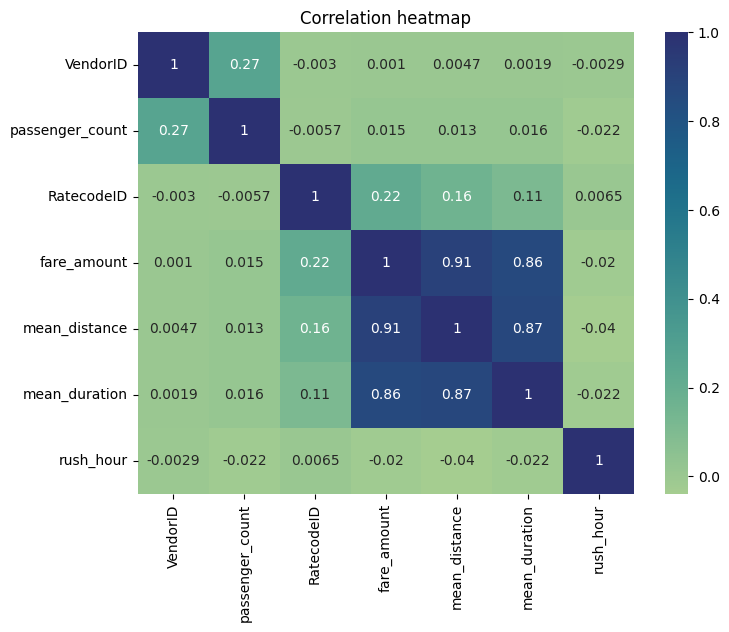

In [100]:
# Create correlation heatmap for visualisation
plt.figure(figsize = (8,6))
sns.heatmap(df2.corr(), annot = True, cmap = 'crest')
plt.title('Correlation heatmap')
plt.show()

`mean_duration` and `mean_distance` are both highly correlated with the target variable `fare_amount`. However, they are also highly correlated with each other, which is undesirable for linear regression models, though they can still be used together in a model if the prediction itself is more important than using the model as a tool to learn about your data.

In [105]:
# Remove the target column from the features
X = df2.drop(columns = ['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()

,VendorID,passenger_count,RatecodeID,mean_distance,mean_duration,rush_hour
0,2,6,1,3.521667,22.847222,0
1,1,1,1,3.108889,24.470370,0
2,1,1,1,0.881429,7.250000,1
3,2,1,1,3.700000,30.250000,0
4,2,1,1,4.435000,14.616667,0


## Encode training variables

In [106]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first = True)
X.head()

,passenger_count,RatecodeID,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,1,3.521667,22.847222,0,1
1,1,1,3.108889,24.470370,0,0
2,1,1,0.881429,7.250000,1,0
3,1,1,3.700000,30.250000,0,1
4,1,1,4.435000,14.616667,0,1


## Split the dataset

In [108]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Standardise the data and fit the model

In [109]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.50301524, -0.05812647,  0.8694684 ,  0.17616665, -0.64893329,
         0.89286563],
       [-0.50301524, -0.05812647, -0.60011281, -0.69829589,  1.54099045,
         0.89286563],
       [ 0.27331093, -0.05812647, -0.47829156, -0.57301906, -0.64893329,
        -1.11998936],
       ...,
       [-0.50301524, -0.05812647, -0.45121122, -0.6788917 , -0.64893329,
        -1.11998936],
       [-0.50301524, -0.05812647, -0.58944763, -0.85743597,  1.54099045,
        -1.11998936],
       [ 1.82596329, -0.05812647,  0.83673851,  1.13212101, -0.64893329,
         0.89286563]])

In [114]:
# Fit your model to the training data
lr = LinearRegression().fit(X_train_scaled, y_train)
lr

LinearRegression()

## Evaluate model

In [115]:
# Evaluate the model performance on the training data
y_train_pred = lr.predict(X_train_scaled)
print('Model performance on the training data:')
print('R^2:', r2_score(y_train, y_train_pred))
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_train_pred)))

Model performance on the training data:
R^2: 0.8473937117072573
MAE: 2.177178058787573
MSE: 17.04635802330477
RMSE: 4.128723534375337


In [116]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

# Evaluate the model performance on the testing data
y_test_pred = lr.predict(X_test_scaled)
print('Model performance on the testing data:')
print('R^2:', r2_score(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))

Model performance on the testing data:
R^2: 0.8744073232537719
MAE: 2.127640707240196
MSE: 13.657775802266608
RMSE: 3.6956428131336785


The model performance is high on both training and testing datasets, suggesting that there is little bias and overfitting in the model. 

$R^2$ of 0.8744 means that 87.44% of the variance in `fare_amount` is explained by the model.

## Results

In [117]:
# Create a `results` dataframe
results = pd.DataFrame(data = {'actual': y_test['fare_amount'], 'predicted': y_test_pred.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.300123,1.699877
18134,28.0,16.311529,11.688471
4655,5.5,6.740871,-1.240871
7378,15.5,16.085262,-0.585262
13914,9.5,10.532428,-1.032428


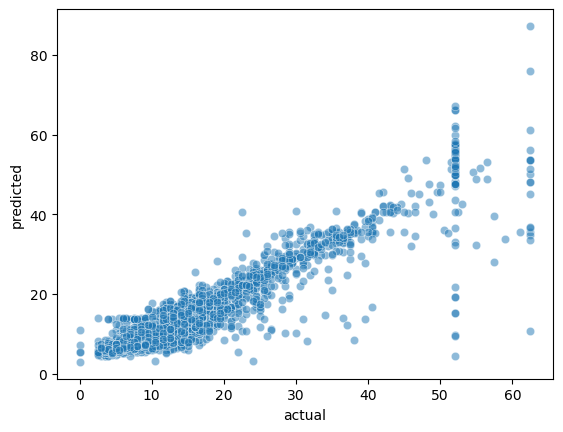

In [118]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(data = results, x = 'actual', y = 'predicted', alpha = 0.5)
plt.show()

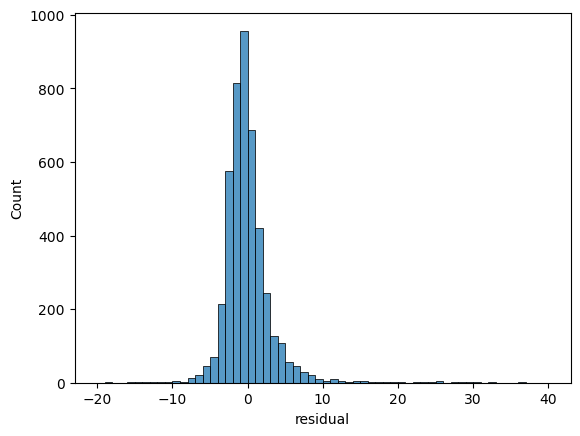

In [119]:
# Visualize the distribution of the `residuals` using a histogram
sns.histplot(data = results, x = 'residual', bins = range(-20, 41, 1))
plt.show()

In [120]:
# Calculate residual mean
results['residual'].mean()

-0.004089310109812353

The mean is almost 0, suggesting that the distribution of residuals is approximately normal and the model's errors are evenly distributed and unbiased.

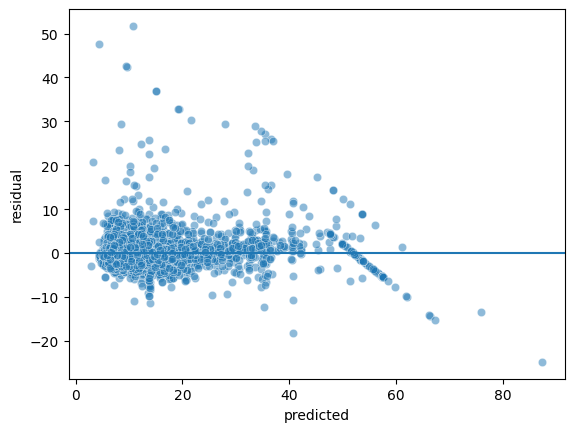

In [121]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(data = results, x = 'predicted', y = 'residual', alpha = 0.5).axhline(0)
plt.show()

Model's residuals are almost evenly distributed above and below 0, with the exception of the 2 sloping lines which are the result of imputing an upper threshold and flat rate for trips to and fro the airport.

## Coefficients

In [123]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns = X.columns)
coefficients

,passenger_count,RatecodeID,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.039253,0.929609,6.911128,2.911777,0.097158,-0.052432


`mean_distance` is the feature with the greatest weight in the model's final prediction. Since the training data was standardised, for every increase of 1 standard deviation of `mean_distance`, keeping other variables constant, `fare_amount` increases by $6.91.

In [126]:
# Unscale the data by dividing the model coefficient by the standard deviation
sd = X_train['mean_distance'].std()
6.911128 / sd

1.9332837963374114

For every 1 mile travelled, `fare_amount` increases by approximately $1.93.